In [1]:
%reset
import sys, platform, os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pdb
import healpy as hp
from astropy.io import fits
import time
import math
from scipy import interpolate
import pickle as pk
import treecorr
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
import pk_to_xi_new as ptx
likef = __import__('3d_like_toimp')
import copy
import scipy.interpolate as interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline as intspline
import scipy.interpolate as interp
import multiprocessing
#see http://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2





Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


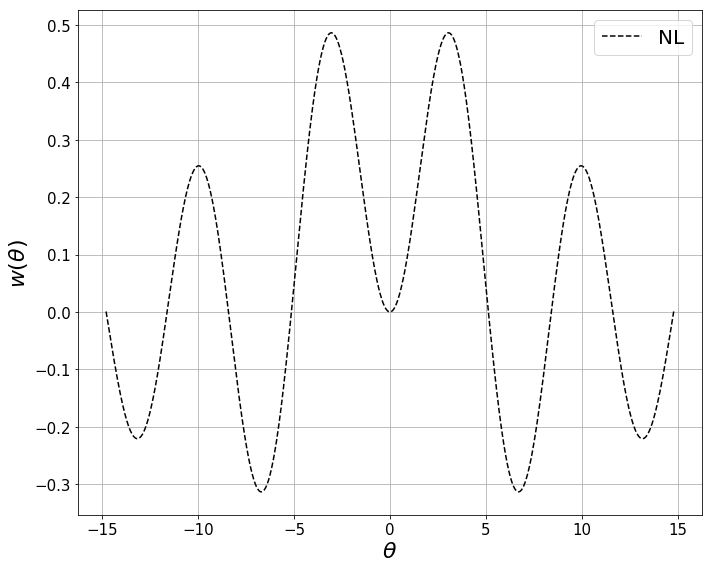

In [3]:
x_array = np.linspace(-14.8,14.8,1000)
j2x = sp.special.jv(2,x_array)

fig, ax = plt.subplots(1,1, figsize = (10,8))


ax.plot(x_array,j2x, color = 'k', marker='',linestyle='--',label=r'NL')


# ax.set_yscale('log')
# ax.set_xscale('log')
ax.grid()
ax.set_ylabel(r'$w(\theta)$', size = 22)
ax.set_xlabel(r'$\theta$', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.tight_layout()

# savename = ''
# for j in range(len(param_name)):
#     param = param_name[j]
#     param_val = str(param_array_bin1[j])
#     savename += param + param_val + '_'

# print savename

# plt.savefig('w_theta_comp.png')












In [12]:

pklin_file = 'pkz_lin_MICE_cosmo.npz'
pknl_file = 'pkz_nl_MICE_cosmo.npz'
nz_dir = '/home/shivam/Research/cosmosis/y3kp-bias-model/3d_stats/3d_to_2d/src/nz_data/'
data_file = '/media/shivam/shivam_backup/Dropbox/research/Cori_files/data_project/mice_sims/measurements/gg_mm__gm_mm_datavec_3dcorr_r_0.8_50.0_nr_20_zbin_1_2_3_4_5_jk_True_njk_180.pk'
twopt_file = fits.open('/home/shivam/Research/cosmosis/y3kp-bias-model/simulations/y1/mice/tpt_rot1_vY1_sn_wcov.fits')

data = pk.load(open(data_file, 'rb'))
r_obs, data_obs, cov_obs = data['sep'], data['mean'], data['cov']
bins_all = [1, 2, 3, 4, 5]
bins_to_fit = [2]
bin_source = 4

bins_to_rem = copy.deepcopy(bins_all)
for bins in bins_to_fit:
    bins_to_rem.remove(bins)

stat_type = 'gg_mm__gm_mm'
r_obs_new, data_obs_new, cov_obs_new = likef.import_data(r_obs, data_obs, cov_obs, bins_to_rem, bins_to_fit, bins_all,stat_type)

k_hres_min = 1e-4
k_hres_max = 500
n_k_hres_bin = 50000

# r_array = r_obs_new[0]
r_array = np.logspace(-2.0,2.5,150)
k_hres = np.logspace(np.log10(k_hres_min), np.log10(k_hres_max), n_k_hres_bin)
reg_c = 10.0

output_nl_grid = True
pt_type = 'oneloop_eul_bk'



Pkz_lin_f = np.load(pklin_file)
Pkz_nl_f = np.load(pknl_file)
klin, zlin_orig, Pkzlin_orig = Pkz_lin_f['k'], Pkz_lin_f['z'], Pkz_lin_f['pkz']
knl, znl_orig, Pnl_kz_orig = Pkz_nl_f['k'], Pkz_nl_f['z'], Pkz_nl_f['pkz']

z_array = np.linspace(0.01,1.5,200)
Pkzlin = np.zeros((len(z_array),Pkzlin_orig.shape[1]))
Pnl_kz = np.zeros((len(z_array),Pnl_kz_orig.shape[1]))
for j in range(len(klin)):
    Pkzlin_interp = interpolate.interp1d(np.log(zlin_orig + 1e-80),np.log(Pkzlin_orig[:,j]),fill_value='extrapolate')
    Pkzlin[:,j] = np.exp(Pkzlin_interp(np.log(z_array + 1e-80)))

for j in range(len(knl)):
    Pkznl_interp = interpolate.interp1d(np.log(znl_orig + 1e-80), np.log(Pnl_kz_orig[:, j]), fill_value='extrapolate')
    Pnl_kz[:, j] = np.exp(Pkznl_interp(np.log(z_array + 1e-80)))

znl = z_array
zlin = z_array
# Pkzlin = np.array([Pkzlin[0,:]])
# Pnl_kz = np.array([Pnl_kz[0,:]])


Pk_terms_names = ['Plin', 'Pmm', 'Pd1d2', 'Pd2d2', 'Pd1s2', 'Pd2s2', 'Ps2s2', 'Pd1d3nl', 'k2Pk', 'sig4']






In [25]:

Pkth_array, karray, xith_array, r_array = ptx.get_Pktharray(output_nl_grid, klin, knl, Pkzlin, Pnl_kz,pt_type=pt_type,Pk_terms_names = Pk_terms_names, z_array=znl, output_xi=True, use_fftlog=False)   





Initializing k-grid quantities...
Warning, you selected a extrap_low that is greater than k_min. Therefore no extrapolation will be done.


In [26]:
xith_array


[array([[ 1.02032825e+02,  1.00645631e+02,  1.00487797e+02, ...,
         -3.79123874e-12,  3.63773619e-12, -3.52973849e-12],
        [ 1.02026839e+02,  1.00639726e+02,  1.00481902e+02, ...,
         -3.79101632e-12,  3.63752278e-12, -3.52953141e-12],
        [ 1.01461259e+02,  1.00081836e+02,  9.99248872e+01, ...,
         -3.77000107e-12,  3.61735840e-12, -3.50996568e-12],
        ...,
        [ 2.97759959e+01,  2.93711744e+01,  2.93251143e+01, ...,
         -1.10638816e-12,  1.06159188e-12, -1.03007516e-12],
        [ 2.96514617e+01,  2.92483333e+01,  2.92024659e+01, ...,
         -1.10176084e-12,  1.05715191e-12, -1.02576701e-12],
        [ 2.95280677e+01,  2.91266169e+01,  2.90809403e+01, ...,
         -1.09717588e-12,  1.05275259e-12, -1.02149830e-12]]),
 array([[ 2.66966841e+04,  2.62210616e+04,  2.57538499e+04, ...,
         -7.71414844e-14,  5.49113101e-14, -7.10717353e-14],
        [ 2.66921601e+04,  2.62166243e+04,  2.57494977e+04, ...,
         -7.71387283e-14,  5.49098046e

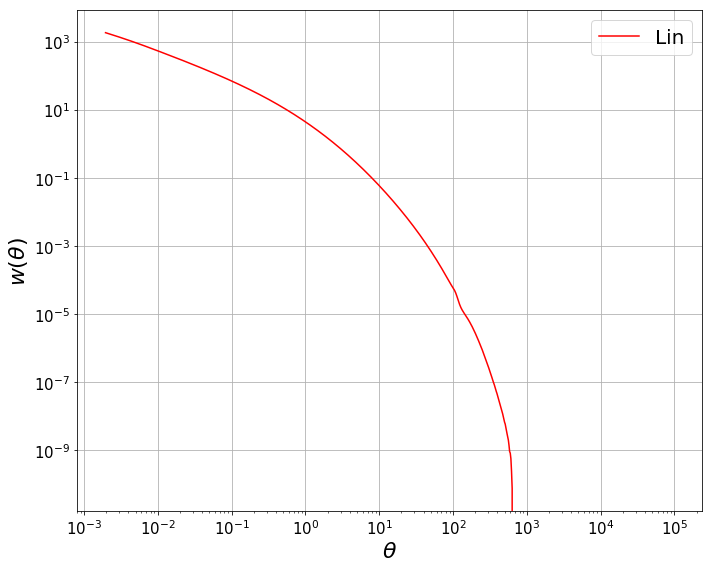

In [16]:
fig, ax = plt.subplots(1,1, figsize = (10,8))


ax.plot(r_array,xith_array[6][0,:], color = 'r', marker='',linestyle='-',label=r'Lin')


ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim(1.0,12.0)
ax.grid()
# ax.set_xlabel(r'$\theta$', size = 18)
ax.set_ylabel(r'$w(\theta)$', size = 22)
ax.set_xlabel(r'$\theta$', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.tight_layout()

# savename = ''
# for j in range(len(param_name)):
#     param = param_name[j]
#     param_val = str(param_array_bin1[j])
#     savename += param + param_val + '_'

# print savename

# plt.savefig('w_theta_comp.png')











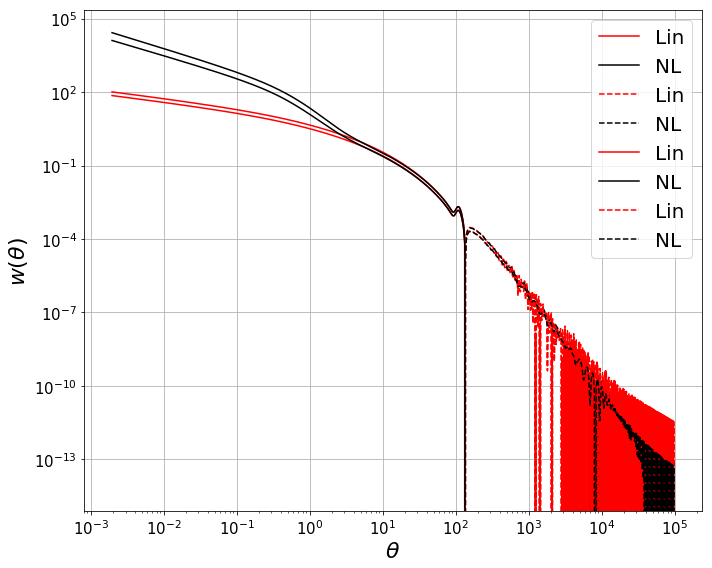

In [10]:
fig, ax = plt.subplots(1,1, figsize = (10,8))


ax.plot(r_array,xith_array[0][0,:], color = 'r', marker='',linestyle='-',label=r'Lin')
ax.plot(r_array,xith_array[1][0,:], color = 'k', marker='',linestyle='-',label=r'NL')
ax.plot(r_array,-1*xith_array[0][0,:], color = 'r', marker='',linestyle='--',label=r'Lin')
ax.plot(r_array,-1*xith_array[1][0,:], color = 'k', marker='',linestyle='--',label=r'NL')

ax.plot(r_array,xith_array[0][50,:], color = 'r', marker='',linestyle='-',label=r'Lin')
ax.plot(r_array,xith_array[1][50,:], color = 'k', marker='',linestyle='-',label=r'NL')
ax.plot(r_array,-1*xith_array[0][50,:], color = 'r', marker='',linestyle='--',label=r'Lin')
ax.plot(r_array,-1*xith_array[1][50,:], color = 'k', marker='',linestyle='--',label=r'NL')


ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim(1.0,12.0)
ax.grid()
# ax.set_xlabel(r'$\theta$', size = 18)
ax.set_ylabel(r'$w(\theta)$', size = 22)
ax.set_xlabel(r'$\theta$', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.tight_layout()

# savename = ''
# for j in range(len(param_name)):
#     param = param_name[j]
#     param_val = str(param_array_bin1[j])
#     savename += param + param_val + '_'

# print savename

# plt.savefig('w_theta_comp.png')








